---
layout: post
title: Graph Heuristics - Intro
categories: [Java Spring]
permalink: /graphs/intro
menu: /nav/graph.html
---

## What is a graph?
- not the coordinate plane graph
- represents a network of relationships between objects

#### Components
- Nodes/Vertices
- Edges
    - Nodes are connected with edges

![alt text](/images/image.png)

#### Representating a Graph
To work with graphs, we need to represent them in code. There are three common ways to do this.

1. Node and Edge Sets
    - List of Nodes (in this case JGraphT calls them Vertices)
    - List of Edges
        - Each edge is represented by the two nodes it is connected to

2. Adjacency Matrix
    - N x N matrix, where N is the number of nodes
    - Column and Row for each node
    - 1 represents an edge between node and column of cell
    - 0 represents no connected between node and column of cell

3. Adjacency List
    - HashMap or Dictionary (python)
    - 1 key for every node
    - Each key's value is a list of all the nodes it is connected to

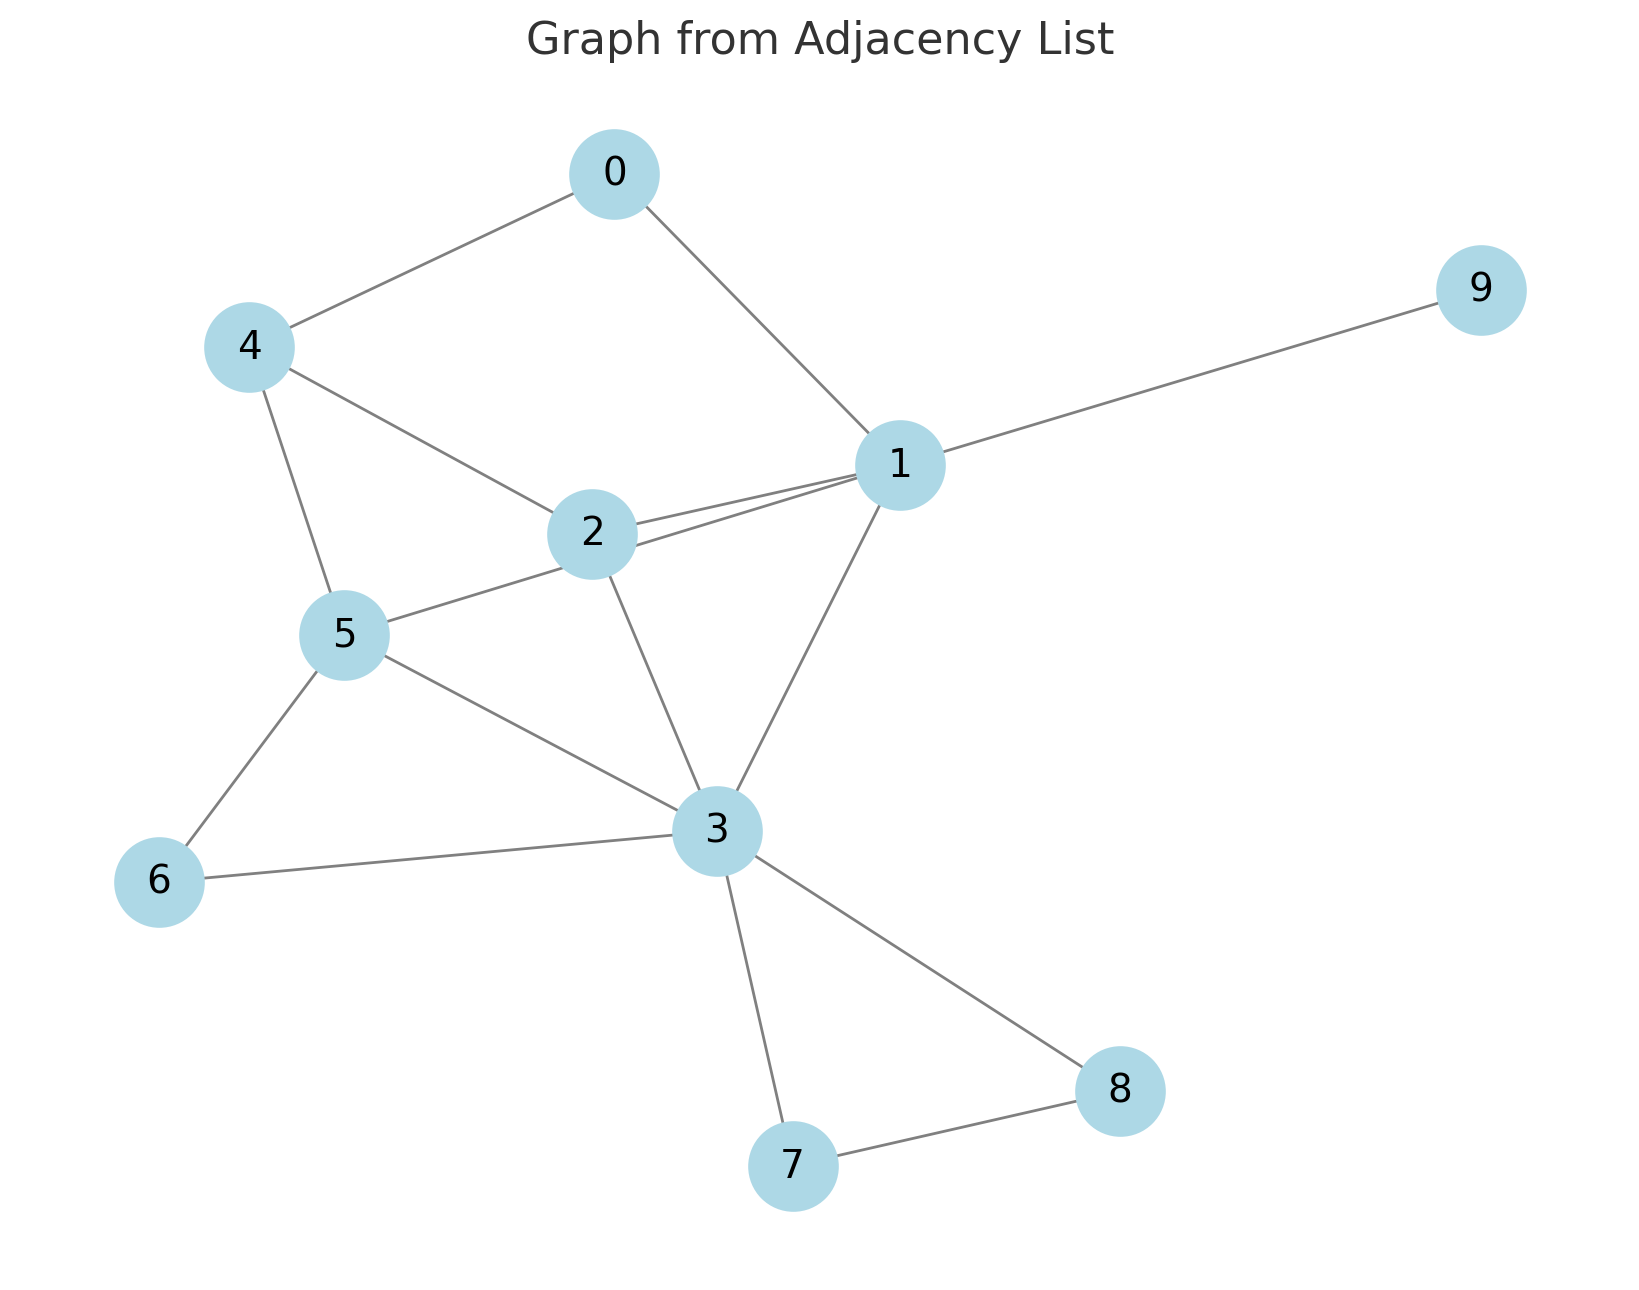

In [1]:
%maven org.jgrapht:jgrapht-core:1.5.1

In [2]:
import org.jgrapht.*;
import org.jgrapht.graph.*;
import org.jgrapht.generate.*;
import org.jgrapht.util.SupplierUtil;

import java.util.*;
import java.util.function.Supplier;

Supplier<String> vSupplier = new Supplier<>() {
    private int id = 0;
    public String get() { return "" + id++; }
};

Graph<String, DefaultEdge> g = new SimpleGraph<>(vSupplier, SupplierUtil.createDefaultEdgeSupplier(), false);

// Generate a random graph with 10 vertices and 15 edges
GnmRandomGraphGenerator<String, DefaultEdge> generator = new GnmRandomGraphGenerator<>(10, 15);
generator.generateGraph(g);

// Display vertex set and edge set
System.out.println("Vertices: " + g.vertexSet());
System.out.println("Edges: " + g.edgeSet());

// Get sorted list of vertices for consistent ordering
List<String> vertices = new ArrayList<>(g.vertexSet());
Collections.sort(vertices);

// Display adjacency matrix
System.out.println("\nAdjacency Matrix:");
// Print header row
System.out.print("  ");
for (String v : vertices) {
    System.out.print(v + " ");
}
System.out.println();

for (String v1 : vertices) {
    System.out.print(v1 + " ");
    for (String v2 : vertices) {
        // Check if edge exists (undirected)
        boolean connected = g.containsEdge(v1, v2);
        System.out.print((connected ? 1 : 0) + " ");
    }
    System.out.println();
}

// Display adjacency list
System.out.println("\nAdjacency List:");
for (String v : vertices) {
    Set<DefaultEdge> edges = g.edgesOf(v);
    // Get adjacent vertices
    List<String> neighbors = new ArrayList<>();
    for (DefaultEdge e : edges) {
        String src = g.getEdgeSource(e);
        String tgt = g.getEdgeTarget(e);
        if (src.equals(v)) {
            neighbors.add(tgt);
        } else {
            neighbors.add(src);
        }
    }
    Collections.sort(neighbors);
    System.out.println(v + ": " + neighbors);
}


Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(3 : 5), (8 : 7), (7 : 3), (2 : 4), (3 : 1), (0 : 1), (4 : 5), (1 : 2), (8 : 3), (6 : 3), (5 : 6), (5 : 1), (2 : 3), (4 : 0), (1 : 9)]

Adjacency Matrix:
  0 1 2 3 4 5 6 7 8 9 
0 0 1 0 0 1 0 0 0 0 0 
1 1 0 1 1 0 1 0 0 0 1 
2 0 1 0 1 1 0 0 0 0 0 
3 0 1 1 0 0 1 1 1 1 0 
4 1 0 1 0 0 1 0 0 0 0 
5 0 1 0 1 1 0 1 0 0 0 
6 0 0 0 1 0 1 0 0 0 0 
7 0 0 0 1 0 0 0 0 1 0 
8 0 0 0 1 0 0 0 1 0 0 
9 0 1 0 0 0 0 0 0 0 0 

Adjacency List:
0: [1, 4]
1: [0, 2, 3, 5, 9]
2: [1, 3, 4]
3: [1, 2, 5, 6, 7, 8]
4: [0, 2, 5]
5: [1, 3, 4, 6]
6: [3, 5]
7: [3, 8]
8: [3, 7]
9: [1]


### Popcorn Hack #1
Which of the three representations above is most efficient?

## Types of Graphs
#### Weighted
In a Weighted Graph, each node is assigned a cost, a number representing cost to traverse that edge. The total cost is the sum of the costs of all nodes traveled. Weighted graphs are useful where traveling between different nodes is less or more prefereable.

#### Directed
In a directed Graph, each node can only be traveled in one direction. 


## Real Applications
1. Traveling Salesman Problem
    - Salesman must travel to every city to sell his products. He wants to do so in least possible time
    - City = Node
    - Path between Cities = Edge
    - Weighted by time it takes to travel between cities
    - Hamiltonian Path/Cycle: path must visit each node exactly once

### Homework Part 1
1. How might I represented a weighted graph? 
    - Using an Adjacency List?
    - Using a Vertex and Edge Set?
2. How might I represented a directed graph?
    - Using an Adjacency List?
    - Using a Vertex and Edge Set?
3. Represent the following graph using an adjacency matrix

![9757ead7-b8c2-42af-ad8c-b8caafa502bc.png](Graph)
